In [2]:
import os
import json
import pandas as pd
import numpy as np

from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [3]:
# # MMMU
# mmmu = load_dataset("lmms-lab/MMMU")
# mmmu

# only load validation set (test has no answer labels)
mmmu_val = load_dataset("lmms-lab/MMMU", split="validation")
mmmu_val

Dataset({
    features: ['id', 'question', 'options', 'explanation', 'image_1', 'image_2', 'image_3', 'image_4', 'image_5', 'image_6', 'image_7', 'img_type', 'answer', 'topic_difficulty', 'question_type', 'subfield'],
    num_rows: 900
})

In [4]:
# df = mmmu["validation"].to_pandas()
# df = mmmu["test"].to_pandas()
df = mmmu_val.to_pandas()
df.head()

,id,question,options,explanation,image_1,image_2,image_3,image_4,image_5,image_6,image_7,img_type,answer,topic_difficulty,question_type,subfield
0,validation_Accounting_1,<image 1> Baxter Company has a relevant range ...,"['$6', '$7', '$8', '$9']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Managerial Accounting
1,validation_Accounting_2,"Assume accounts have normal balances, solve fo...","['$194,815', '$182,815', '$12,000', '$9,000']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],C,Medium,multiple-choice,Financial Accounting
2,validation_Accounting_3,"Maxwell Software, Inc., has the following mutu...","['Project A', 'Project B']",Discount each project's cash flows at 15 perce...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Financial Accounting
3,validation_Accounting_4,Each situation below relates to an independent...,"['$1,620', '$12,000', '$51,180', '$0']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],D,Easy,multiple-choice,Financial Accounting
4,validation_Accounting_5,The following data show the units in beginning...,"['132,625', '134,485', '135,332', '132,685']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Managerial Accounting


In [5]:
df.keys()

Index(['id', 'question', 'options', 'explanation', 'image_1', 'image_2',
       'image_3', 'image_4', 'image_5', 'image_6', 'image_7', 'img_type',
       'answer', 'topic_difficulty', 'question_type', 'subfield'],
      dtype='object')

In [6]:
df.question_type.value_counts()

question_type
multiple-choice    847
open                53
Name: count, dtype: int64

In [7]:
df.subfield.value_counts()

subfield
Music                             30
Market Research                   30
Sociology Theory                  30
Plant Pathology                   28
Epidemiology                      26
                                  ..
Geographic Information Systems     1
Business Management                1
Fluid Dynamics                     1
Clinical Psychology                1
Abnormal Psychology                1
Name: count, Length: 129, dtype: int64

In [21]:
# Print all subfield value counts without getting cutoff
with pd.option_context('display.max_rows', None):
    print(df.subfield.value_counts())

subfield
Music                                       30
Market Research                             30
Sociology Theory                            30
Plant Pathology                             28
Epidemiology                                26
Mechanics of Materials                      26
Art History                                 26
Drawing and Painting                        23
Surveying and Mapping                       21
Children's Literature                       20
Macroeconomics                              20
Medicinal Chemistry                         20
Geotechnical Engineering                    18
World History                               16
Neuropathology                              16
Electrical Circuit                          15
Management Models                           14
Pathophysiology                             14
Fluid Mechanics                             14
Inorganic Chemistry                         13
Organic Chemistry                           13
Desi

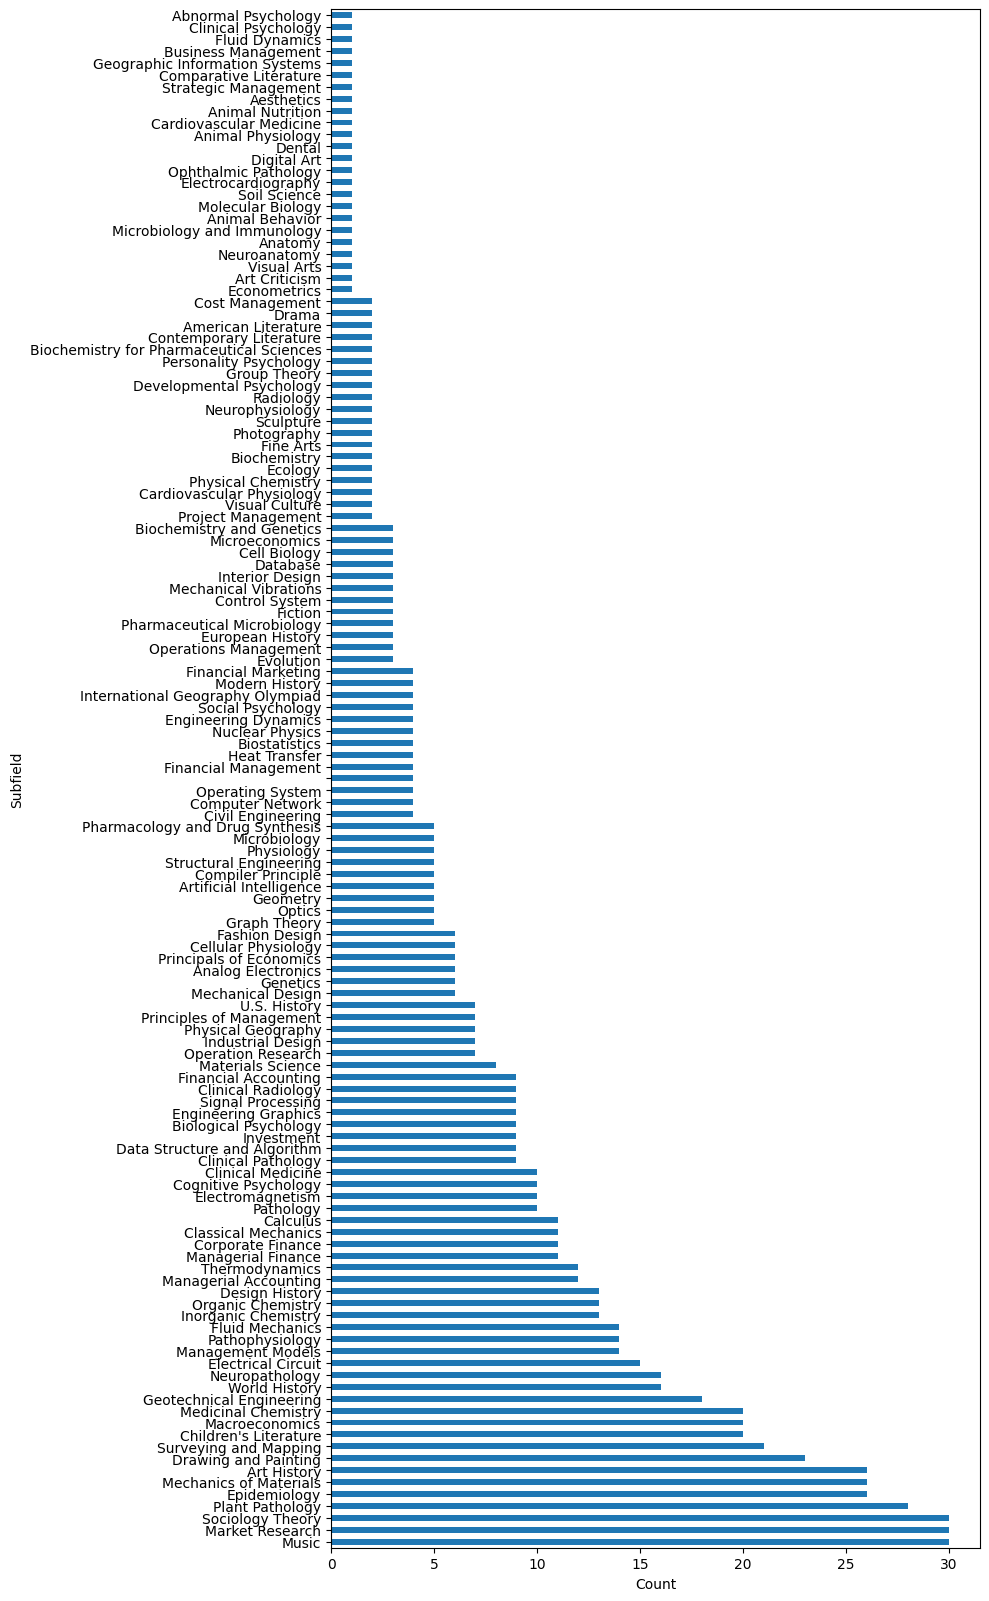

In [20]:
# plot the count of subfields horizontally, with a large enough figure to show all labels
import pandas as pd
import matplotlib.pyplot as plt

subfield_counts = df.subfield.value_counts()
n_subfields = len(subfield_counts)
fig_height = max(6, n_subfields * 0.125)  # scale height to number of subfields

plt.figure(figsize=(10, fig_height))
subfield_counts.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Subfield")
plt.tight_layout()
plt.show()

In [8]:
df.topic_difficulty.value_counts()

topic_difficulty
Medium    424
Easy      295
Hard      181
Name: count, dtype: int64

In [9]:
df_mc = df[df.question_type == "multiple-choice"]
df_mc.answer.value_counts()

answer
A    242
B    230
C    198
D    149
E     25
F      2
I      1
Name: count, dtype: int64

In [10]:
df.img_type.value_counts()

img_type
['Diagrams']                              223
['Tables']                                170
['Plots and Charts']                       78
['Photographs']                            75
['Paintings']                              46
                                         ... 
['Diagrams', 'Mathematical Notations']      1
['Plots and Charts', 'Tables']              1
['Diagrams', 'Historical Timelines']        1
['Paintings', 'Poster']                     1
['Poster', 'Other']                         1
Name: count, Length: 64, dtype: int64

In [15]:
all_img_types = set()

for img_type in df.img_type:
    all_img_types.update(ast.literal_eval(img_type))

all_img_types

{'Advertisements',
 'Body Scans: MRI, CT scans, and X-rays',
 'Chemical Structures',
 'Comics and Cartoons',
 'DNA Sequences',
 'Diagrams',
 'Geometric Shapes',
 'Historical Timelines',
 'Icons and Symbols',
 'Landscapes',
 'Logos and Branding',
 'Maps',
 'Mathematical Notations',
 'Medical Images',
 'Microscopic Images',
 'Other',
 'Paintings',
 'Pathological Images',
 'Photographs',
 'Plots and Charts',
 'Portraits',
 'Poster',
 'Screenshots',
 'Sculpture',
 'Sheet Music',
 'Sketches and Drafts',
 'Tables',
 'Technical Blueprints',
 'Trees and Graphs'}

In [12]:
# print dist of count of options
import ast
df.options.apply(lambda x: len(ast.literal_eval(x))).value_counts()

options
4    606
3    111
5     91
0     53
2     28
6      5
9      4
7      2
Name: count, dtype: int64

In [13]:
df.options[0]

"['$6', '$7', '$8', '$9']"

In [22]:
df.subfield.value_counts()

subfield
Music                             30
Market Research                   30
Sociology Theory                  30
Plant Pathology                   28
Epidemiology                      26
                                  ..
Geographic Information Systems     1
Business Management                1
Fluid Dynamics                     1
Clinical Psychology                1
Abnormal Psychology                1
Name: count, Length: 129, dtype: int64

In [40]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")     # 384‑dim vectors
subfield_names = df.subfield.unique()
X = model.encode(subfield_names)                    # (N, 384)

# pick a distance threshold or number of clusters
# clust = AgglomerativeClustering(distance_threshold=1.2,
#                                 n_clusters=None,        # let it choose
#                                 metric="cosine", linkage="average").fit(X)
n = 7
clust = AgglomerativeClustering(n_clusters=n,
                                metric="cosine", linkage="average").fit(X)

labels = clust.labels_
labels

array([0, 0, 0, 4, 1, 3, 6, 1, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 3, 4, 2, 2, 4, 4, 6, 6, 6, 4, 4, 4, 2,
       4, 0, 0, 0, 5, 0, 0, 2, 2, 6, 2, 2, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 6, 6, 6, 0, 0, 0, 0, 6, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 2, 1, 2, 6, 0, 6, 6, 6, 6,
       2, 4, 4, 4, 4, 0, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2])

In [42]:
subfield_df = df.subfield.value_counts().reset_index()
# add then cluster labels
subfield_cluster_map = {
    subfield: int(cluster_idx)
    for subfield, cluster_idx in zip(subfield_names, labels)
}

subfield_df["cluster"] = subfield_df.subfield.map(subfield_cluster_map)
subfield_df

,subfield,count,cluster
0,Music,30,2
1,Market Research,30,0
2,Sociology Theory,30,2
3,Plant Pathology,28,4
4,Epidemiology,26,4
...,...,...,...
124,Geographic Information Systems,1,1
125,Business Management,1,0
126,Fluid Dynamics,1,6
127,Clinical Psychology,1,2


In [43]:
subfield_df.groupby("cluster").size()

cluster
0    30
1     6
2    40
3     2
4    30
5     1
6    20
dtype: int64

In [44]:
subfield_df.groupby("cluster")["count"].sum()

cluster
0    225
1     39
2    260
3      2
4    194
5      5
6    175
Name: count, dtype: int64

In [45]:
from sentence_transformers import SentenceTransformer
from scipy.cluster.hierarchy import linkage
import numpy as np, pandas as pd

model  = SentenceTransformer("all-MiniLM-L6-v2")   # or any embedding you like
labels = df['subfield'].tolist()                  # your 130 × 1 series
X      = model.encode(labels)                     # (n, 384)

Z = linkage(X, method="average", metric="cosine") # produces the dendrogram


In [62]:
from sknetwork.hierarchy import cut_balanced      # pip install scikit-network

balanced_labels = cut_balanced(Z, max_cluster_size=200)  # ≤ 15 per bucket
df['cluster'] = balanced_labels
df.head()

,id,question,options,explanation,image_1,image_2,image_3,image_4,image_5,image_6,image_7,img_type,answer,topic_difficulty,question_type,subfield,cluster
0,validation_Accounting_1,<image 1> Baxter Company has a relevant range ...,"['$6', '$7', '$8', '$9']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Managerial Accounting,0
1,validation_Accounting_2,"Assume accounts have normal balances, solve fo...","['$194,815', '$182,815', '$12,000', '$9,000']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],C,Medium,multiple-choice,Financial Accounting,0
2,validation_Accounting_3,"Maxwell Software, Inc., has the following mutu...","['Project A', 'Project B']",Discount each project's cash flows at 15 perce...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Financial Accounting,0
3,validation_Accounting_4,Each situation below relates to an independent...,"['$1,620', '$12,000', '$51,180', '$0']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],D,Easy,multiple-choice,Financial Accounting,0
4,validation_Accounting_5,The following data show the units in beginning...,"['132,625', '134,485', '135,332', '132,685']",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Tables'],B,Medium,multiple-choice,Managerial Accounting,0


In [63]:
df.groupby("cluster").size().sort_values(ascending=False)

cluster
0    157
1    150
2    143
3    122
4     99
5     97
6     79
7     51
8      2
dtype: int64

In [64]:
df[df["cluster"].isin([8])]

,id,question,options,explanation,image_1,image_2,image_3,image_4,image_5,image_6,image_7,img_type,answer,topic_difficulty,question_type,subfield,cluster
41,validation_Agriculture_12,The circular rings of muscle that are at the e...,"['Cholera', 'Emulsification', 'Anthrax', 'Peri...",,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Microscopic Images'],A,Medium,multiple-choice,Animal Nutrition,8
187,validation_Biology_8,Reto Zach studied the whelk-eating behavior of...,['Flight Path A: the crow has a wider view of ...,,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,None,None,None,None,None,None,['Diagrams'],A,Medium,multiple-choice,Animal Behavior,8


In [71]:
# subfield -> cluster map
subfield_cluster_map = {}
for subfield, cluster in df[["subfield", "cluster"]].values:
    subfield_cluster_map[subfield] = cluster

subfield_cluster_map

# save to a json file
import json

with open("/home/ellisbrown/workspace/test-set-training/src/TsT/benchmarks/mmmu/subfield_cluster_map.json", "w") as f:
    json.dump(subfield_cluster_map, f)

In [66]:
# save to a json file
import json

subfield_cluster_map = {
    subfield: cluster
    for subfield, cluster in zip(df.subfield.unique(), labels)
}

with open("/home/ellisbrown/workspace/test-set-training/src/TsT/benchmarks/mmmu/subfield_cluster_map.json", "w") as f:
    json.dump(subfield_cluster_map, f)